(sec:visualization_3)=
# 판다스 시각화 도구

In [1]:
import numpy as np
import pandas as pd

In [2]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

In [3]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
plt.rc("figure", figsize=(10, 6))

`datetime.datetime` 자료형은 시간(날짜) 데이터를 다룬다.

In [6]:
from datetime import datetime

## 시리즈 시각화

In [7]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64

<Axes: >

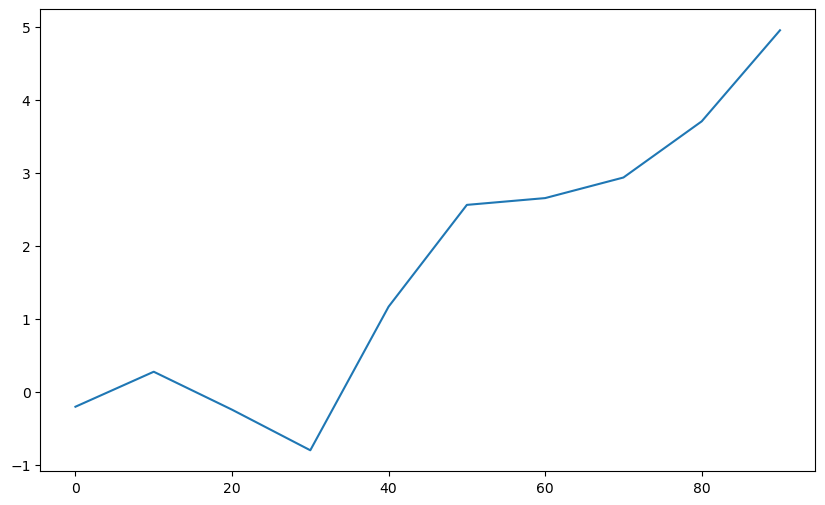

In [8]:
s.plot()

시리즈/데이터프레임의 `plot()` 메서드의 `style` 키워드 인자는 
`plt.plot()` 함수의 `linestyle` 키워드 인자와 동일한 기능을 수행한다.

<Axes: >

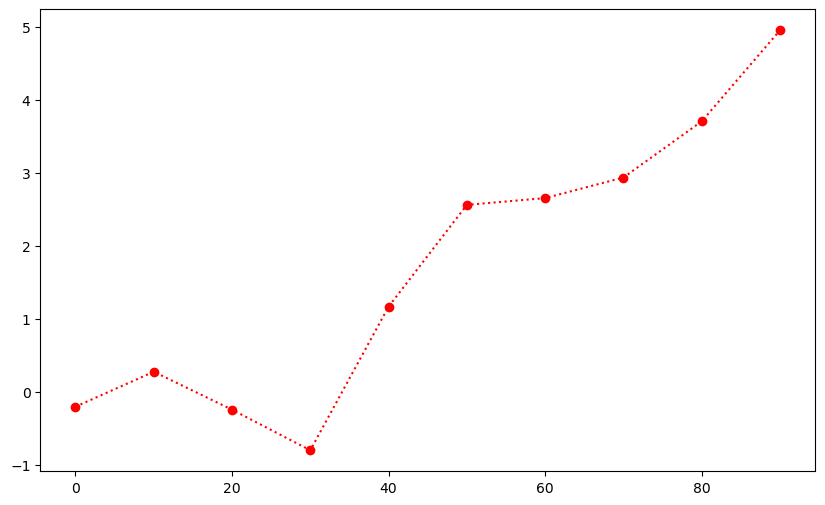

In [9]:
s.plot(style='o:r')

<Axes: >

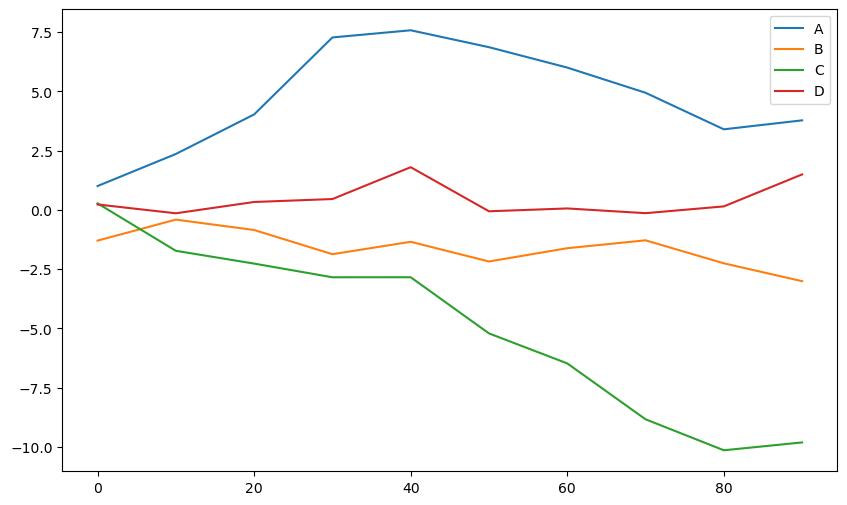

In [10]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

df.plot()

In [11]:
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

<Axes: >

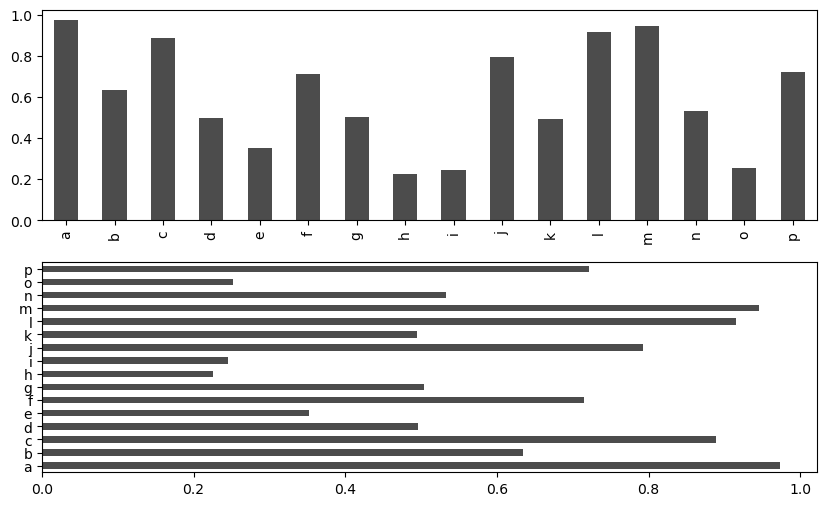

In [12]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

## 데이터프레임 시각화

In [13]:
np.random.seed(12348)

df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

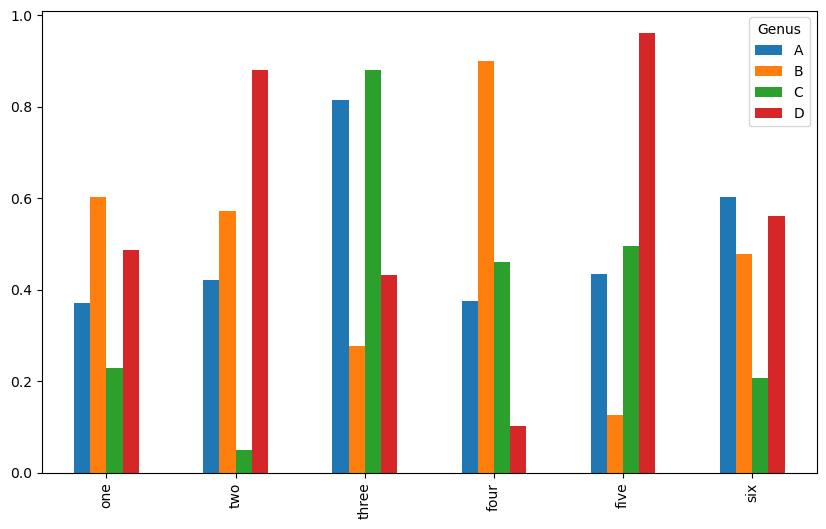

In [14]:
df.plot.bar()

<Axes: >

<Figure size 1000x600 with 0 Axes>

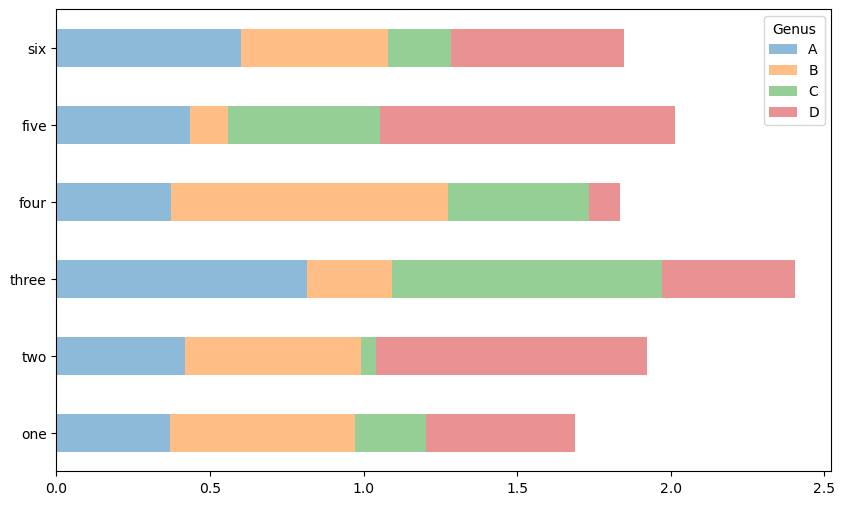

In [15]:
plt.figure()

df.plot.barh(stacked=True, alpha=0.5)

**그래프 스타일 변환**

판다스의 시각화 도구는 `matplotlib.pyplot` 라이브러리를 이용한다.
따라서 `matplotlib.pyplot`와 동일한 방식으로 그래프 스타일을 변경할 수 있다.
예를 들어 아래 코드를 실행하면 흑백으로 그래프를 그린다.

In [16]:
plt.style.use('grayscale')

<Axes: >

<Figure size 1000x600 with 0 Axes>

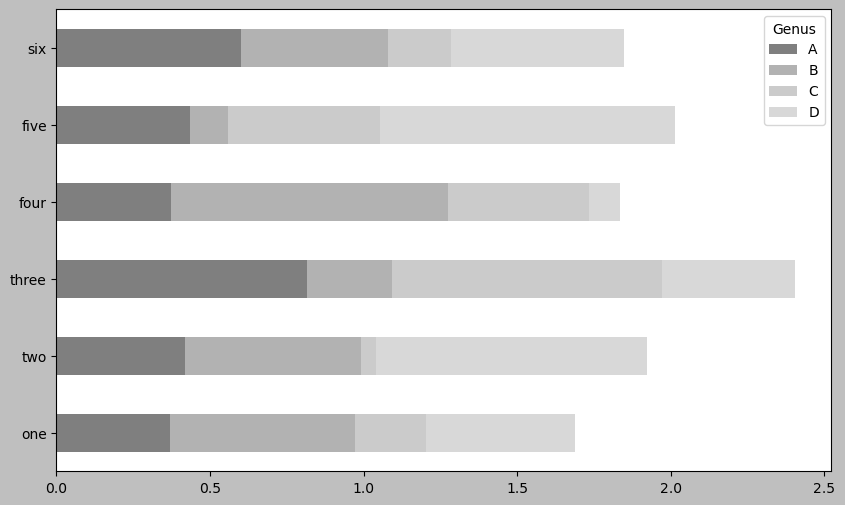

In [17]:
plt.figure()

df.plot.barh(stacked=True, alpha=0.5)

In [18]:
base_url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'

In [19]:
tips = pd.read_csv(base_url+"tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [20]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [22]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [23]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

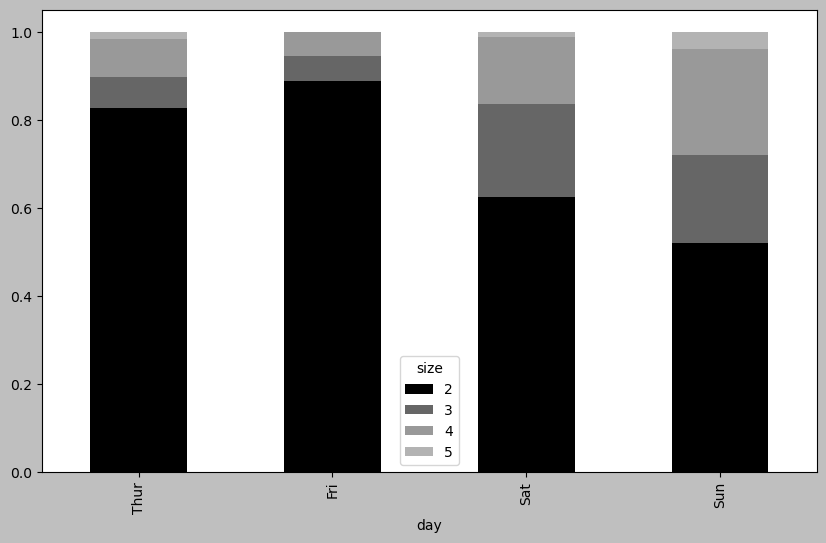

In [24]:
party_pcts.plot.bar(stacked=True)

seaborn 스타일로 변환한다.

In [25]:
plt.style.use('seaborn-v0_8')

<Axes: xlabel='day'>

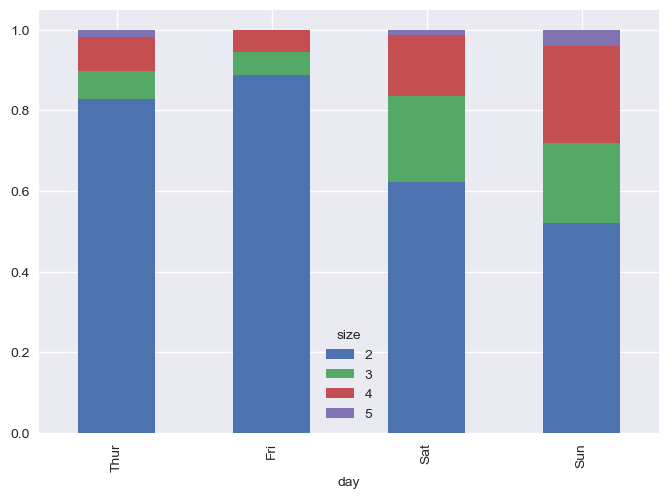

In [26]:
party_pcts.plot.bar(stacked=True)

In [27]:
plt.close('all')

## 주석 추가

이미지에 주석을 추가할 수 있다.

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [28]:
base_url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'

In [29]:
data = pd.read_csv(base_url+"spx.csv")
data

,Unnamed: 0,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


여기서는 시간 컬럼을 행의 인덱스로 사용한다.

- `index_col=0`: 0번 열(column)을 인덱스로 사용
- `parse_dates=True`: 년월일까지만 구분해서 인덱스로 사용하도록 함. 기본값은 `False`.

In [30]:
data = pd.read_csv(base_url+"spx.csv", index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


하나의 열만 존재하는 데이터프레임이기에 시리즈로 변환한다.

__참고:__ 반드시 필요한 과정은 아니다. `spx` 대신 `data`를 그대로 사용해도 동일하게 작동한다.

In [31]:
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

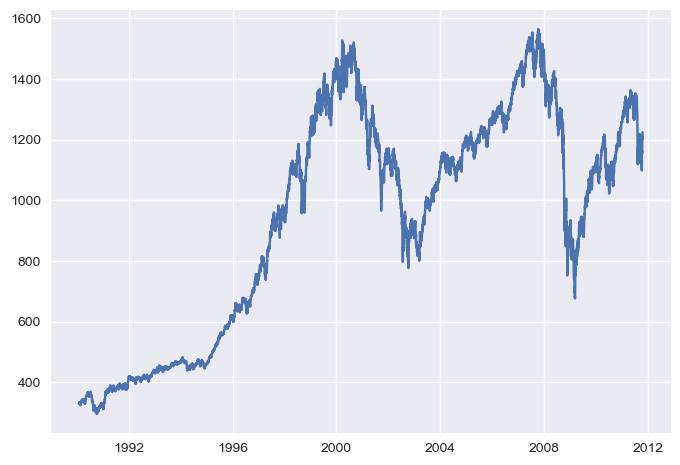

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(spx)

2007-2008년 세계적 금융위기 지점을 아래 내용으로 그래프에 주석으로 추가해보자.

- 2007년 10월 11일: 주가 강세장 위치
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴
- 2008년 9월 15일: 레만 투자은행 파산

In [33]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

**`annotate()` 메서드 활용**

- `xt` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

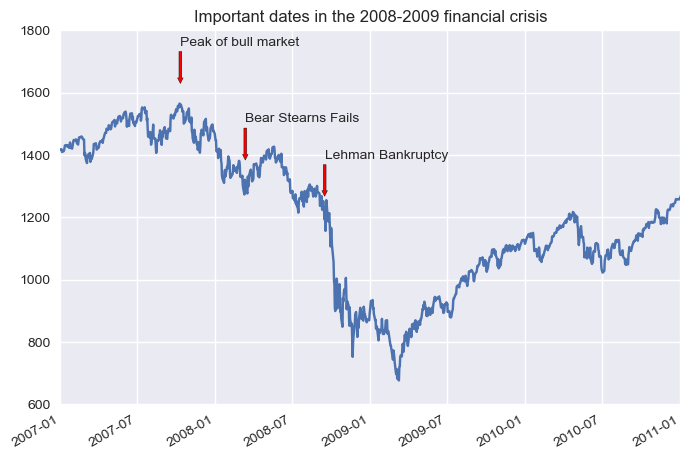

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim((pd.to_datetime("2007-1-1", format='%Y-%m-%d'), pd.to_datetime("2011-1-1", format='%Y-%m-%d')))
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [35]:
plt.close('all')

## matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 이미지의 사이즈를 지정한다.

In [36]:
plt.rc('figure', figsize=(6, 6))

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

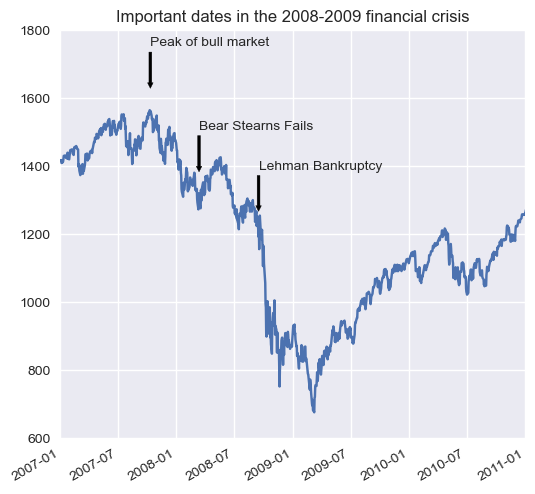

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# spx.plot(ax=ax, style='k-')
spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim((pd.to_datetime("2007-1-1", format='%Y-%m-%d'), pd.to_datetime("2011-1-1", format='%Y-%m-%d')))

ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [38]:
plt.rc('figure', figsize=(10, 6))

* 선 속성 지정

In [39]:
plt.rc('lines', linewidth=3, color='b')

* 텍스트 폰트 속성 지정

In [40]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : '15'}
plt.rc('font', **font_options)

* 그래프 구성 요소의 색상 지정

In [41]:
plt.rcParams['text.color'] = 'blue'
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = '#CD5C5C'  # RGB 색상

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

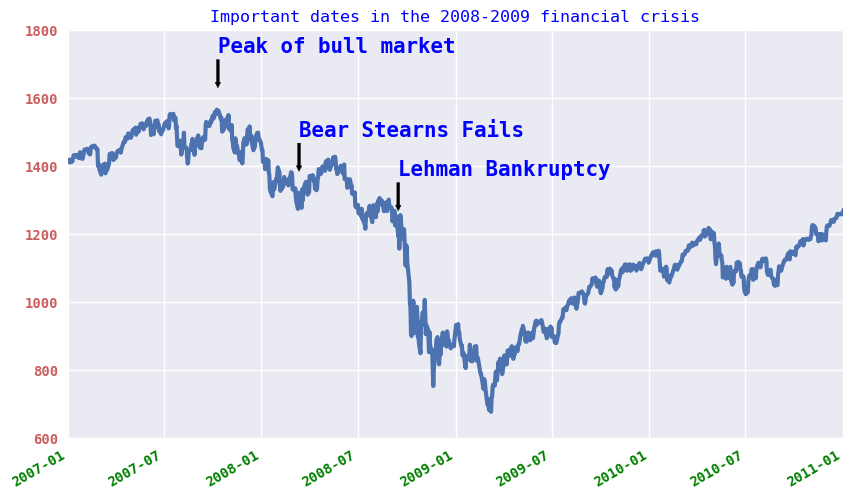

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# spx.plot(ax=ax, style='k-')
spx.plot(ax=ax, style='-')    # 기본 색상 사용

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim((pd.to_datetime("2007-1-1", format='%Y-%m-%d'), pd.to_datetime("2011-1-1", format='%Y-%m-%d')))
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [43]:
plt.close('all')